In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

#### Reading the data
1. Load the Visium spatial transcriptomics dataset from the specified folder.
2. Ensure that all gene names are unique to avoid conflicts during analysis.
3. Create a new column in the gene metadata to flag mitochondrial genes.
4. Calculate quality control (QC) metrics, including the percentage of mitochondrial gene expression.These metrics help assess the quality of each spot/cell in the dataset

In [2]:
adata = sc.read_visium('DD073R_A1_processed') 

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\2689903689.py:1: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium('DD073R_A1_processed')
c:\Users\19utk\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\19utk\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata.var_names_make_unique()

adata.var['mt'] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [3]:
adata # 1175  spots and 36601 genes

AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
adata.obs.head(3)

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAGAGCGACTCCT-1,1,14,94,2265,7.725771,4567.0,8.426830,24.523757,33.873440,44.230348,59.054084,379.0,5.940171,8.298664
AAACAGGGTCTATATT-1,1,47,13,6792,8.823648,47816.0,10.775137,52.085076,58.927974,65.942362,73.142881,1505.0,7.317213,3.147482
AAACCGGGTAGGTACC-1,1,42,28,2418,7.791110,5088.0,8.534837,23.919025,31.741352,41.332547,56.721698,576.0,6.357842,11.320755


In [5]:
adata.var.head(3)

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,0,0.0,0.0,100.0,0.0,0.0
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,0,0.0,0.0,100.0,0.0,0.0
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,0,0.0,0.0,100.0,0.0,0.0


#### QC metrics
1. total_counts - total number of captured transcripts in that spot.
2. n_genes_by_counts - number of genes with at least one detected transcript in a spot.
3. pct_counts_mt - percentage of total transcripts in a spot that come from mitochondrial genes.
4. n_cells_by_counts - number of spots in which that gene is detected at least once.

In [ ]:
# contains images and metadata
# adata.uns['spatial']['DD73RA1_rep2']['images']['hires']
adata.uns['spatial']['DD73RA1_rep2']['images']['hires'].shape

(2000, 1815, 3)

In [ ]:
adata.obsm['spatial'] # contains coordinates of each spot on the tissue

array([[2162,  856],
       [ 581, 1964],
       [ 873, 1796],
       ...,
       [1143, 2339],
       [ 909, 2406],
       [ 853, 1898]], dtype=int64)

In [10]:
adata.X # stores the actual count or expression matrix

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3003183 stored elements and shape (1175, 36601)>

#### QC and preprocessing


C:\Users\19utk\AppData\Local\Temp\ipykernel_49544\1581485598.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.

C:\Users\19utk\AppData\Local\Temp\ipykernel_49544\1581485598.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.

C:\Users\19utk\AppData\Local\Temp\ipykernel_49544\1581485598.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.



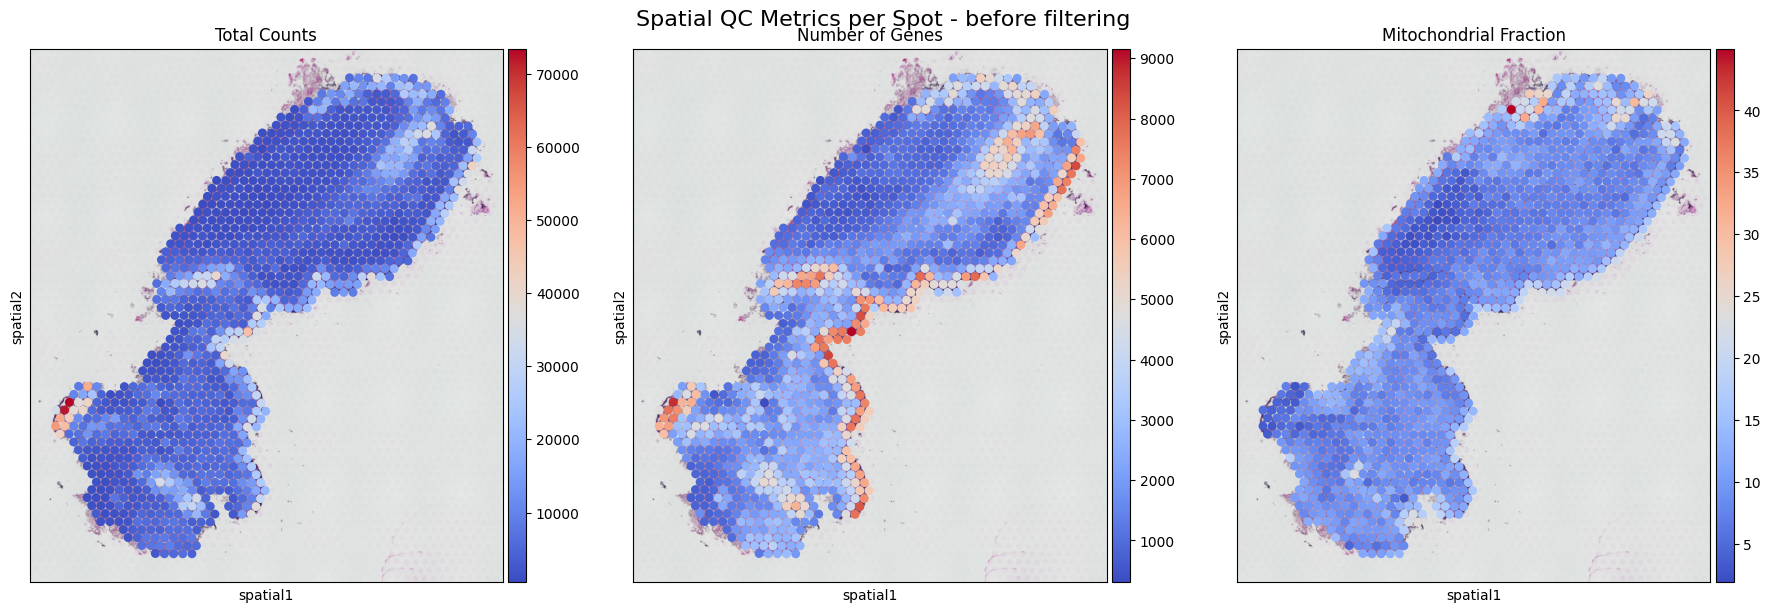

In [45]:
qc_metrics = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
titles = ['Total Counts', 'Number of Genes', 'Mitochondrial Fraction']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(qc_metrics):
    sc.pl.spatial(
        adata,
        img_key="hires",
        color=metric,
        ax=axs[i],
        show=False,      
        size=1.5,       
        cmap='coolwarm', 
        title=titles[i]
    )

fig.suptitle('Spatial QC Metrics per Spot - before filtering', fontsize=16)
plt.tight_layout()
plt.show()


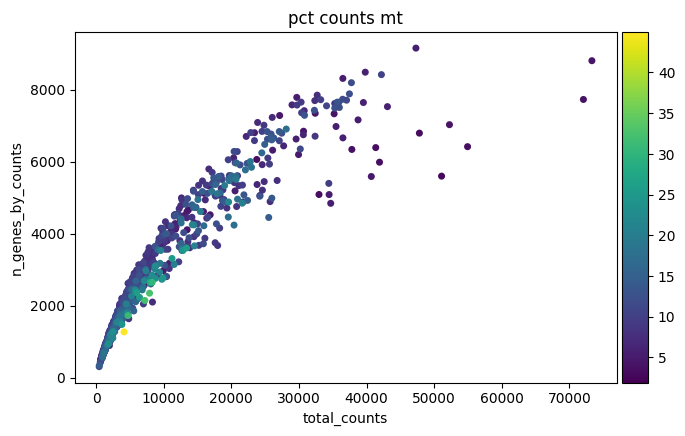

In [52]:
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [4]:
lower_count = np.percentile(adata.obs['total_counts'], 1)
upper_count = np.percentile(adata.obs['total_counts'], 99)

# Histogram of total counts
fig1 = px.histogram(
    adata.obs,
    x='total_counts',
    nbins=100
)
fig1.update_layout(
    title={'text': 'Histogram of Total Counts', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Total Counts',
    yaxis_title='Number of Spots'
)
# Add vertical percentile lines
fig1.add_vline(x=lower_count, line=dict(color='red', dash='dash'), annotation_text='1%', annotation_position='top left')
fig1.add_vline(x=upper_count, line=dict(color='red', dash='dash'), annotation_text='99%', annotation_position='top right')
fig1.show()


In [5]:
lower_genes = np.percentile(adata.obs['n_genes_by_counts'], 1)
upper_genes = np.percentile(adata.obs['n_genes_by_counts'], 99)

# Histogram of number of genes per spot
fig2 = px.histogram(
    adata.obs,
    x='n_genes_by_counts',
    nbins=100
)
fig2.update_layout(
    title={'text': 'Histogram of Number of Genes per Spot', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Number of Genes',
    yaxis_title='Number of Spots',
)
# Add vertical percentile lines
fig2.add_vline(x=lower_genes, line=dict(color='red', dash='dash'), annotation_text='1%', annotation_position='top left')
fig2.add_vline(x=upper_genes, line=dict(color='red', dash='dash'), annotation_text='99%', annotation_position='top right')
fig2.show()

In [ ]:
fig = px.violin(
    adata.obs,
    y='pct_counts_mt',    
    box=True,             
    points='all',       
    hover_data=adata.obs.columns,
)
fig.update_layout(
    title={'text': 'Violin plot of Mitochondrial Fraction', 'x': 0.5, 'xanchor': 'center'},
    yaxis_title='MT fraction',
    xaxis_title=''
)
fig.show()


In [53]:
# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.5, multi_panel=True)

#### Filtering spots



In [6]:
# 1. Filter out spots whose total counts fall below the 1st percentile or above the 99th percentile.

lower = np.percentile(adata.obs['total_counts'], 1)
upper = np.percentile(adata.obs['total_counts'], 99)

mask = (adata.obs['total_counts'] > lower) & (adata.obs['total_counts'] < upper)
adata_filtered = adata[mask, :].copy()

print(f"Original spots: {adata.n_obs}")
print(f"Filtered spots: {adata_filtered.n_obs}")

Original spots: 1175
Filtered spots: 1151


In [7]:
adata = adata_filtered

In [8]:
# 2. Filter out spots whose gene count fall below the 1st percentile or above the 99th percentile.

lower = np.percentile(adata.obs['n_genes_by_counts'], 1)
upper = np.percentile(adata.obs['n_genes_by_counts'], 99)

mask = (adata.obs['n_genes_by_counts'] > lower) & (adata.obs['n_genes_by_counts'] < upper)
adata_filtered = adata[mask, :].copy()

print(f"Original spots: {adata.n_obs}")
print(f"Filtered spots: {adata_filtered.n_obs}")

Original spots: 1151
Filtered spots: 1127


In [9]:
adata = adata_filtered

In [10]:
# 3. Filter spots with mito fraction > 15
adata = adata[adata.obs['pct_counts_mt'] < 15]

In [11]:
# 4. Only keep genes detected in atleast 3 spots
sc.pp.filter_genes(adata, min_cells=3)    

c:\Users\19utk\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:293: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



In [12]:
adata

AnnData object with n_obs × n_vars = 1027 × 18420
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\577476400.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\577476400.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\577476400.py:7: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.



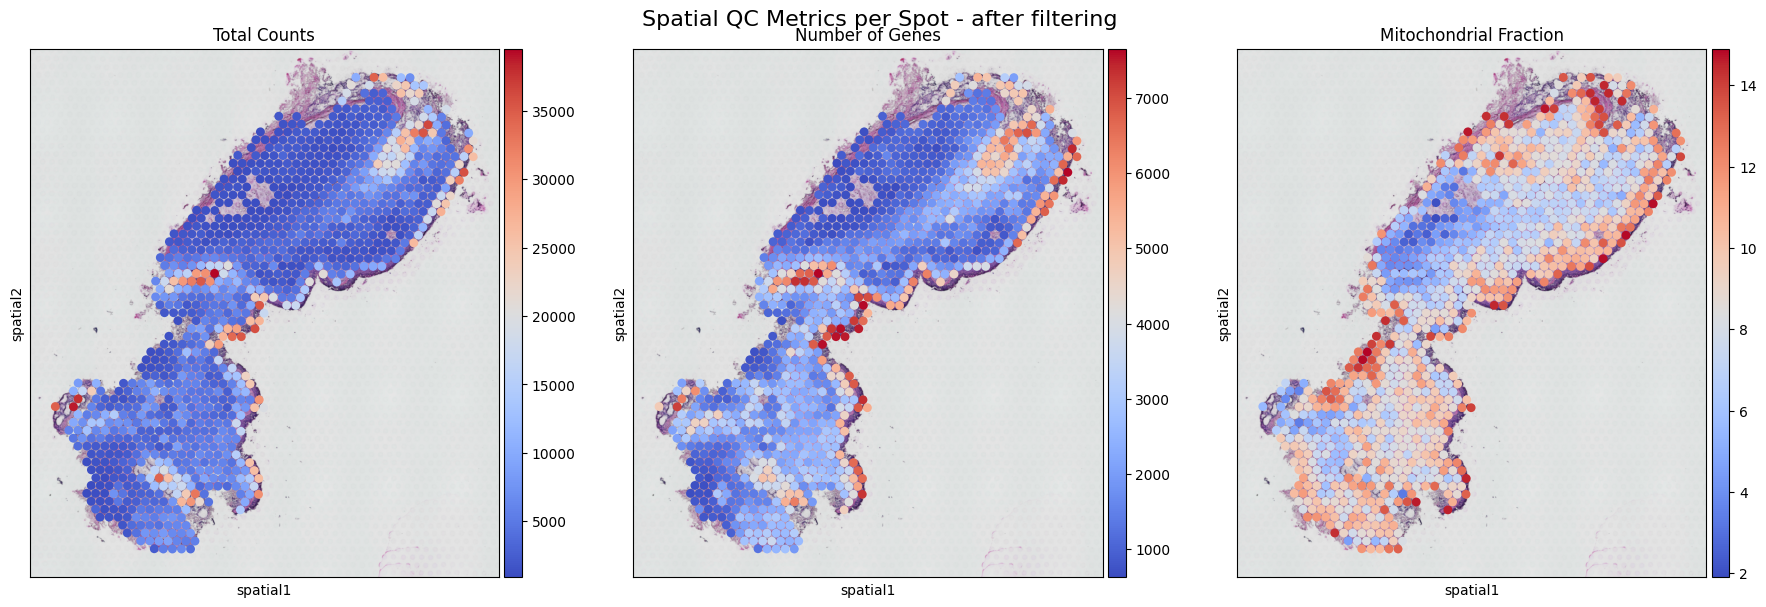

In [13]:
qc_metrics = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
titles = ['Total Counts', 'Number of Genes', 'Mitochondrial Fraction']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(qc_metrics):
    sc.pl.spatial(
        adata,
        img_key="hires",
        color=metric,
        ax=axs[i],
        show=False,     
        size=1.5,       
        cmap='coolwarm', 
        title=titles[i]
    )

fig.suptitle('Spatial QC Metrics per Spot - after filtering', fontsize=16)
plt.tight_layout()
plt.show()

#### Normalization and finding HVGs
1. Library-size normalization
2. Logarithmic transformation
3. Highly Variable Gene (HVG) selection
 

In [14]:
sc.pp.normalize_total(adata, inplace = True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)

#### Dimensionality reduction and clustering

In [15]:
sc.pp.pca(adata, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.umap(adata)
sc.tl.leiden(adata)

c:\Users\19utk\anaconda3\Lib\site-packages\scanpy\preprocessing\_pca\__init__.py:227: FutureWarning:

Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None

c:\Users\19utk\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\2018577287.py:5: FutureWarning:

In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.



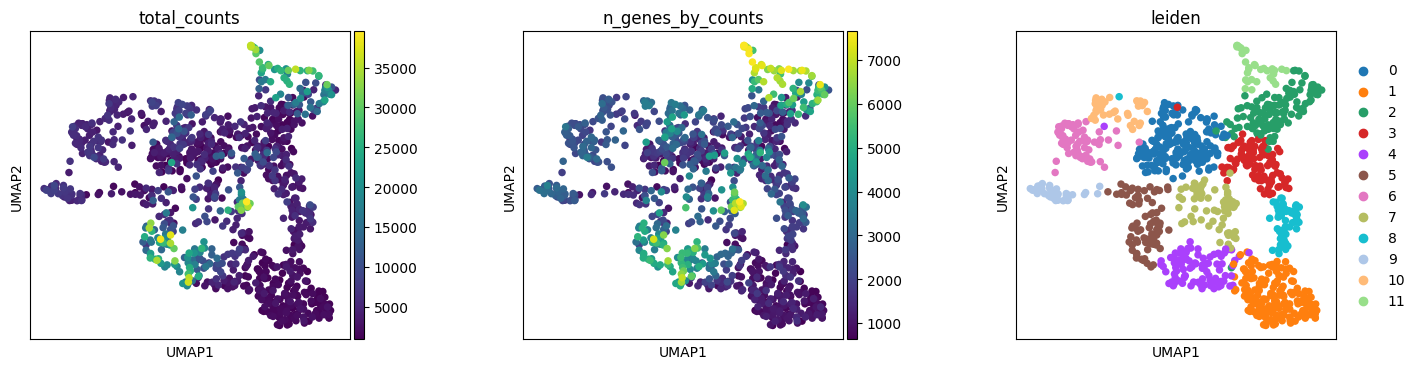

In [16]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\1279764846.py:2: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.



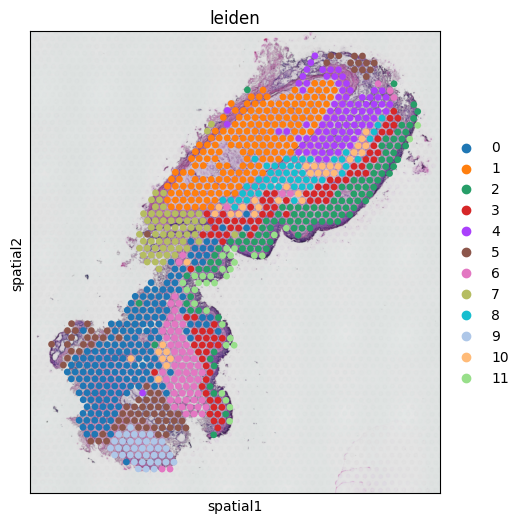

In [17]:
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.3)

#### Identification of marker genes

In [ ]:
# 1. Marker genes - genes define each cluster: 
# performs a one-vs-rest differential expression test for each cluster

sc.tl.rank_genes_groups(adata, "leiden", inplace = True, method='wilcoxon')

categories: 0, 1, 2, etc.
var_group_labels: 1


{'heatmap_ax': <Axes: >,
 'groupby_ax': <Axes: ylabel='leiden'>,
 'dendrogram_ax': <Axes: >,
 'gene_groups_ax': <Axes: >}

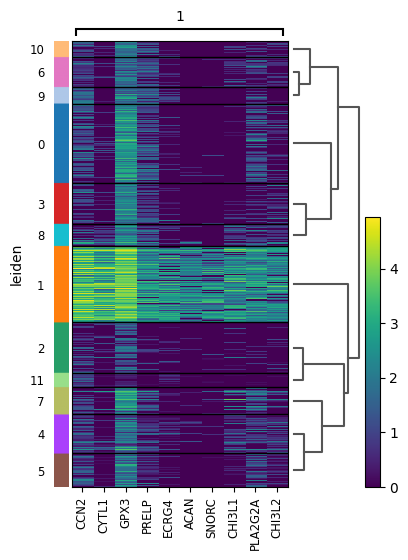

In [19]:
# top 10 marker genes for cluster 1
sc.pl.rank_genes_groups_heatmap(adata, groups = "1", groupby = "leiden", show = False)

C:\Users\19utk\AppData\Local\Temp\ipykernel_18492\1681352604.py:2: FutureWarning:

Use `squidpy.pl.spatial_scatter` instead.



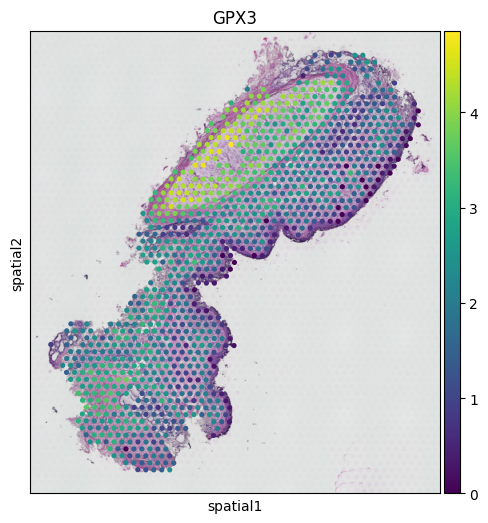

In [20]:
# structural expression pattern of one of the above gene GPX3
sc.pl.spatial(adata, img_key = "hires", color="GPX3")